https://sci-hub.se/10.1016/j.physd.2013.07.016

In [9]:
import numpy as np
import jax.numpy as jnp

omega = 1

# Base oscillator system
class BaseOsc:
    def __init__(self, r_0 = 1):
        self.r_0 = r_0

    def get_gradient(self, p):
        r, theta = p[...,0], p[...,1]
        dtheta = 2 * np.pi * omega
        dr = - r + self.r_0
        return np.stack([dr, dtheta], axis=-1)

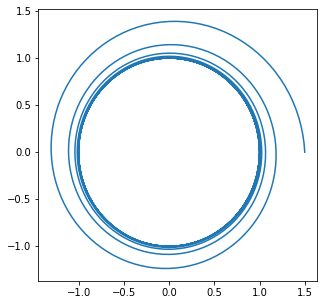

In [11]:
import matplotlib.pyplot as plt 

def cart_to_polar(p):
    r, theta = p[...,0], p[...,1]
    x, y = r * np.cos(theta), r * np.sin(theta)
    return np.stack([x, y], axis=-1)

state = np.array([1.5, 0])

osc = BaseOsc()
state_history = []
for i in range(1000):    
    state_history.append(state.copy())
    state = state + 0.01 * osc.get_gradient(state)
state_history = np.array(state_history)
state_history_cartesian = cart_to_polar(state_history)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(state_history_cartesian[:,0], state_history_cartesian[:,1])

Now we test morphing

In [18]:
from jax import grad

def morph(theta):
    return jnp.exp(jnp.sin(4 * theta))

class CPG:
    def __init__(self, f, base_osc):
        self.base_osc = base_osc
        self.f = f
        self.grad_f = grad(f)

    def get_gradient(self, p):
        """ 
        Args:
            p: point in polar coordinates
        
        Return: 
            dp: gradient in polar coordinates
        """
        rs, theta = p[...,0], p[...,1]
        rb = rs / self.f(theta)

        dpb = self.base_osc.get_gradient(np.stack([rb, theta], axis=-1)) 
        drb, dtheta = dpb[...,0], dpb[...,1]

        drs = rb * self.grad_f(theta) + drb * self.f(theta)
        return np.stack([drs, dtheta], axis=-1)

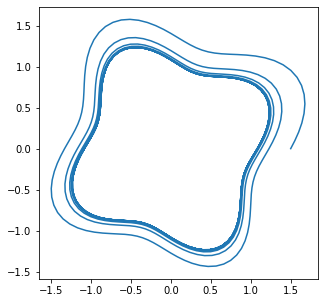

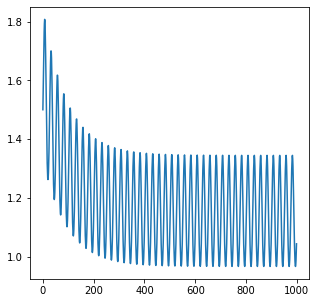

In [21]:
state = np.array([1.5, 0])

osc = CPG(morph, BaseOsc())

state_history = []
for i in range(1000):    
    state_history.append(state.copy())
    state = state + 0.01 * osc.get_gradient(state)
state_history = np.array(state_history)
state_history_cartesian = cart_to_polar(state_history)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(state_history_cartesian[:,0], state_history_cartesian[:,1])

time = np.arange(len(state_history))
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(time, state_history[:,0])

Could SIRENs parametrize the high-frequency diffeomorphism between the high-dimensional space and the latent space? 